In [2]:
import numpy as np

import random

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10.0, 7.0)


# Classifier

## Dataset

In [13]:
random.seed(331)

mean_0 = [0, 0]
cov_0 = [[1, 0], [0, 100]]
nb_0 = 200
x_0, y_0 = np.random.multivariate_normal(mean_0, cov_0, nb_0).T

mean_1 = [4, 3]
cov_1 = [[4, 12], [12, 50]]
nb_1 = 100
x_1, y_1 = np.random.multivariate_normal(mean_1, cov_1, nb_1).T


In [14]:
x_2 = list(x_0) + list(x_1)
y_2 = list(y_0) + list(y_1)
z_2 = [random.uniform(0, 100) for v in range(nb_0+nb_1)]

X = np.transpose(np.array([x_2, y_2, z_2]))
y = np.array([True for i in range(nb_0)] + [False for i in range(nb_1)])
Y = np.transpose(np.array([y, ~y]))


In [15]:
X.shape, Y.shape

((300, 3), (300, 2))

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((201, 3), (99, 3), (201, 2), (99, 2))

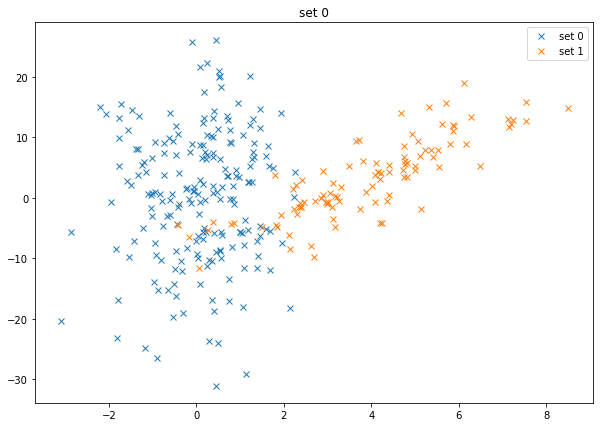

In [17]:
plt.figure()
plt.title('set 0')
plt.plot(X[Y[:,0]][:,0], X[Y[:,0]][:,1], 'x', label='set 0')
plt.plot(X[Y[:,1]][:,0], X[Y[:,1]][:,1], 'x', label='set 1')
plt.legend()
plt.show()


## Model definition

In [54]:
model = Sequential()
model.add(Dense(8, input_dim=3, kernel_initializer='normal', activation='relu'))
model.add(Dense(2, kernel_initializer='normal', activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Model fit

In [55]:
model.fit(X_train, Y_train, batch_size=12, epochs=100)


Epoch 1/100
201/201 [==============================] - 0s 2ms/step - loss: 0.7461 - acc: 0.3682
Epoch 2/100
201/201 [==============================] - 0s 97us/step - loss: 0.6855 - acc: 0.5423
Epoch 3/100
201/201 [==============================] - 0s 253us/step - loss: 0.6570 - acc: 0.6617
Epoch 4/100
201/201 [==============================] - 0s 227us/step - loss: 0.6395 - acc: 0.6617
Epoch 5/100
201/201 [==============================] - 0s 215us/step - loss: 0.6273 - acc: 0.6617
Epoch 6/100
201/201 [==============================] - 0s 250us/step - loss: 0.6195 - acc: 0.6667
Epoch 7/100
201/201 [==============================] - 0s 258us/step - loss: 0.6106 - acc: 0.6692
Epoch 8/100
201/201 [==============================] - 0s 374us/step - loss: 0.6020 - acc: 0.6965
Epoch 9/100
201/201 [==============================] - 0s 269us/step - loss: 0.5937 - acc: 0.7114
Epoch 10/100
201/201 [==============================] - 0s 247us/step - loss: 0.5835 - acc: 0.7289
Epoch 11/100
201/201 [

201/201 [==============================] - 0s 166us/step - loss: 0.1074 - acc: 0.9652
Epoch 84/100
201/201 [==============================] - 0s 170us/step - loss: 0.1057 - acc: 0.9751
Epoch 85/100
201/201 [==============================] - 0s 213us/step - loss: 0.1078 - acc: 0.9701
Epoch 86/100
201/201 [==============================] - 0s 366us/step - loss: 0.1063 - acc: 0.9602
Epoch 87/100
201/201 [==============================] - 0s 221us/step - loss: 0.1062 - acc: 0.9627
Epoch 88/100
201/201 [==============================] - 0s 257us/step - loss: 0.1054 - acc: 0.9652
Epoch 89/100
201/201 [==============================] - 0s 217us/step - loss: 0.1055 - acc: 0.9701
Epoch 90/100
201/201 [==============================] - 0s 212us/step - loss: 0.1045 - acc: 0.9627
Epoch 91/100
201/201 [==============================] - 0s 146us/step - loss: 0.1005 - acc: 0.9701
Epoch 92/100
201/201 [==============================] - 0s 216us/step - loss: 0.1032 - acc: 0.9652
Epoch 93/100
201/201 [=

In [56]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 8)                 32        
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 18        
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


In [57]:
print('Train: ', model.evaluate(X_train, Y_train))
print('Test: ', model.evaluate(X_test, Y_test))


201/201 [==============================] - 0s 800us/step
Train:  [0.09694897841235892, 0.972636815920398]
99/99 [==============================] - 0s 89us/step
Test:  [0.19145159208864876, 0.9292929292929293]


## Predictions

In [58]:
x_min = np.min(X[:,0]) - 0.5
x_max = np.max(X[:,0]) + 0.5

y_min = np.min(X[:,1]) - 5
y_max = np.max(X[:,1]) + 5

h = 0.5


In [59]:
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h),
                         [np.mean(X[:,2])])

x_ok, y_ok = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


In [60]:
Y_pred = model.predict(np.transpose(np.array([xx.ravel(), yy.ravel(), zz.ravel()])))
#Y_pred = Y_pred[:,0].reshape(x_ok.shape)


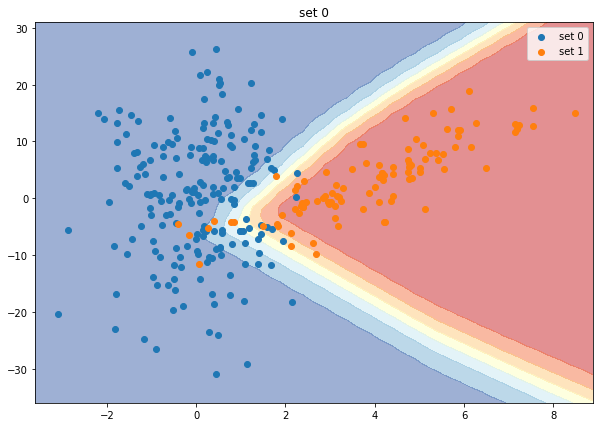

In [61]:
plt.figure()
plt.title('set 0')
plt.contourf(x_ok, y_ok, Y_pred[:,0].reshape(x_ok.shape), cmap='RdYlBu', alpha=0.5)
plt.scatter(X[Y[:,0]][:,0], X[Y[:,0]][:,1], label='set 0')
plt.scatter(X[Y[:,1]][:,0], X[Y[:,1]][:,1], label='set 1')
plt.legend()
plt.show()
